# **1. Perkenalan Dataset**


Dataset yang akan digunakan adalah dataset harga rumah di India yang memiliki 23 attribute yang terdiri dari number of bedroom, number of bathroom, living area, lot area, number of floors, waterfront present, number of views, dsb. Dataset ini dipilih karena memiliki attribute paling banyak dibandingkan dataset lain yang ditemukan pada Kaggle oleh karena itu seharusnya dengan dataset ini maka model yang dilatih akan dapat secara akurat memprediksi harga rumah di India karena attributenya yang beragam. Dataset ini dapat di akses https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india. Tujuan dari proyek ini yaitu untuk meneliti seberapa akurat prediksi harga rumah di India dengan membandingkan beberapa model machine learning seperti LSTM, GRU, Random Forest kemudian dibandingkan dengan harga asli beberapa rumah dengan di coba dengan inferensi.

Pembelian rumah merupakan keputusan jangka panjang setiap orang, oleh karena itu perlu dibuat model prediksi harga rumah yang dapat memprediksi harga suatu rumah berdasarkan karakteristik yang diinginkan oleh calon pembeli rumah dengan tujuan memiliki gambaran tentang harga rumah impian mereka.

# **2. Import Library**

Mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data.

In [19]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [20]:
df = pd.read_csv('house-price-india_raw.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


# **4. Exploratory Data Analysis (EDA)**

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [21]:
print("=== Data Shape ===")
df.shape

=== Data Shape ===


(14620, 23)

In [22]:
print("--- Info Data Rumah ---")
df.info()

--- Info Data Rumah ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 n

In [23]:
print("=== Duplicate Check ===")
print("Jumlah duplikasi: ", df.duplicated().sum())

=== Duplicate Check ===
Jumlah duplikasi:  0


In [24]:
print("=== Missing Values ===")
df.isna().sum()

=== Missing Values ===


id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [25]:
print(df.describe())

                 id          Date  number of bedrooms  number of bathrooms  \
count  1.462000e+04  14620.000000        14620.000000         14620.000000   
mean   6.762821e+09  42604.538646            3.379343             2.129583   
std    6.237575e+03     67.347991            0.938719             0.769934   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14620.000000  1.462000e+04      14620.000000        14620.000000   
mean    2098.262996  1.509328e+04          1.502360            0.007661   
std      928.275721  3.791962e+04          0.540239            0.087193 

## **A. Univariate Analysis**

In [26]:
# Memperlihatkan columns yang akan digunakan untuk univariate analysis
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Numerical columns:", num_cols)

Numerical columns: ['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']


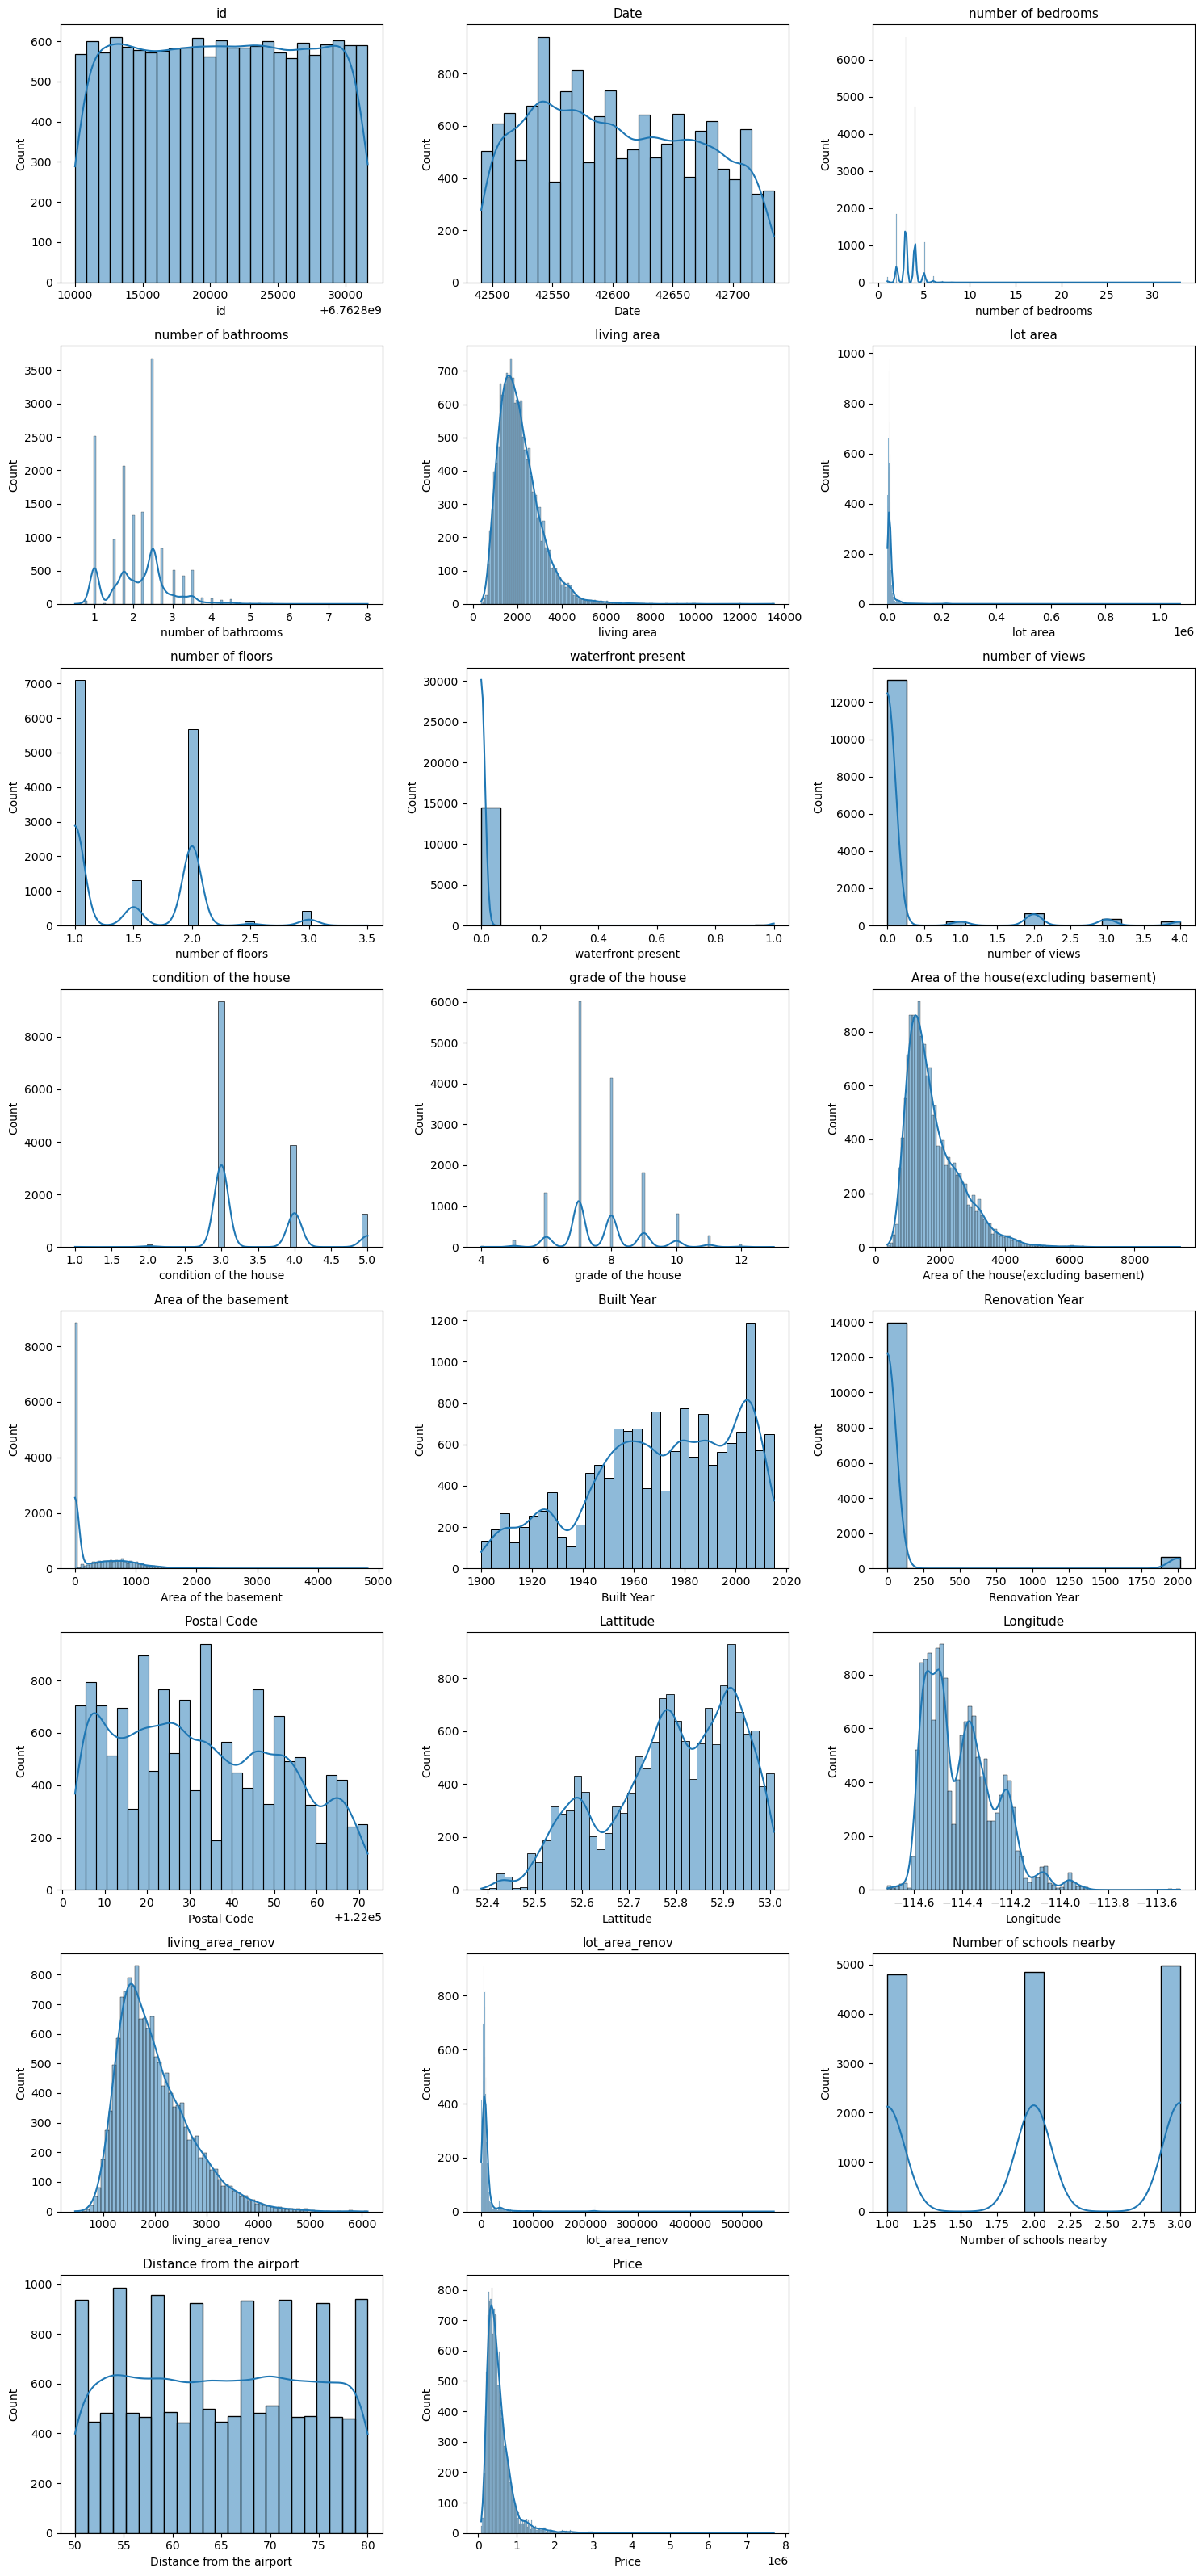

In [27]:
# Numerical distributions
n_cols = 3                         
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col, fontsize=11)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])            
plt.tight_layout()
plt.show()

## **B. Multivariate Analysis**

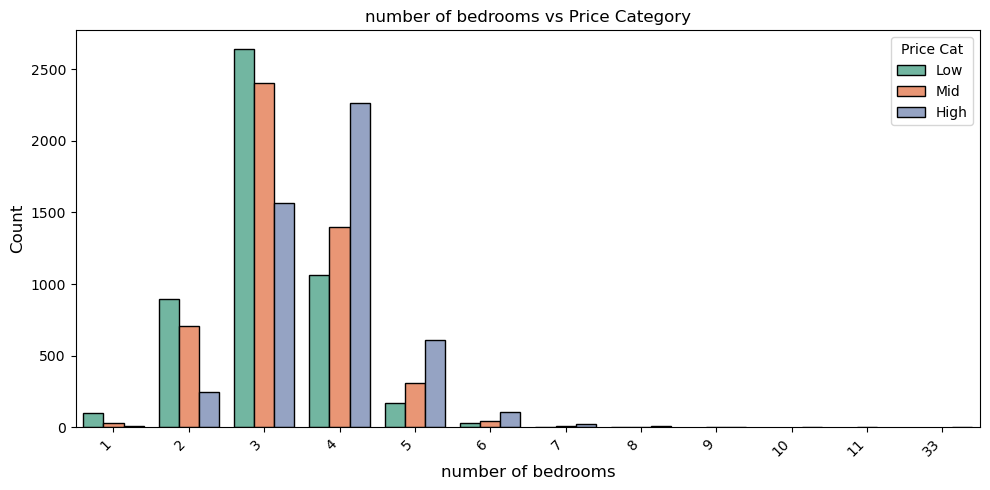

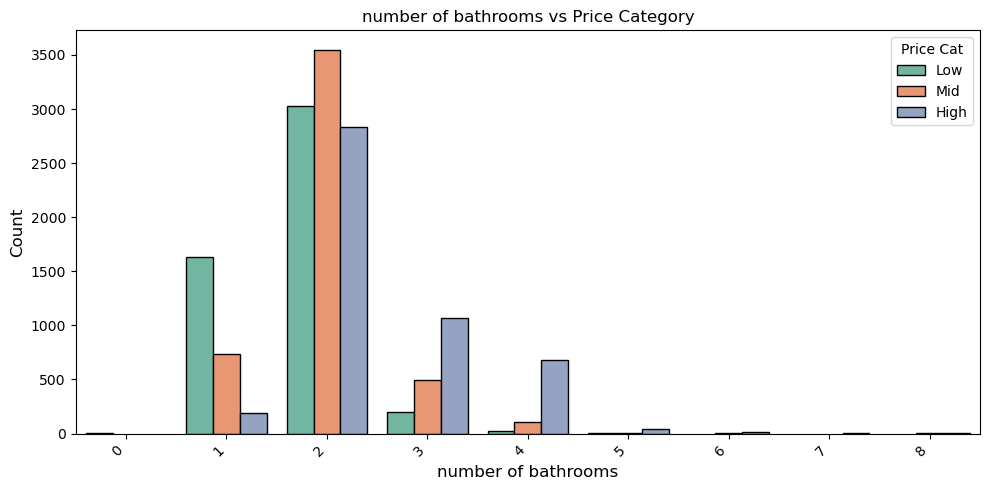

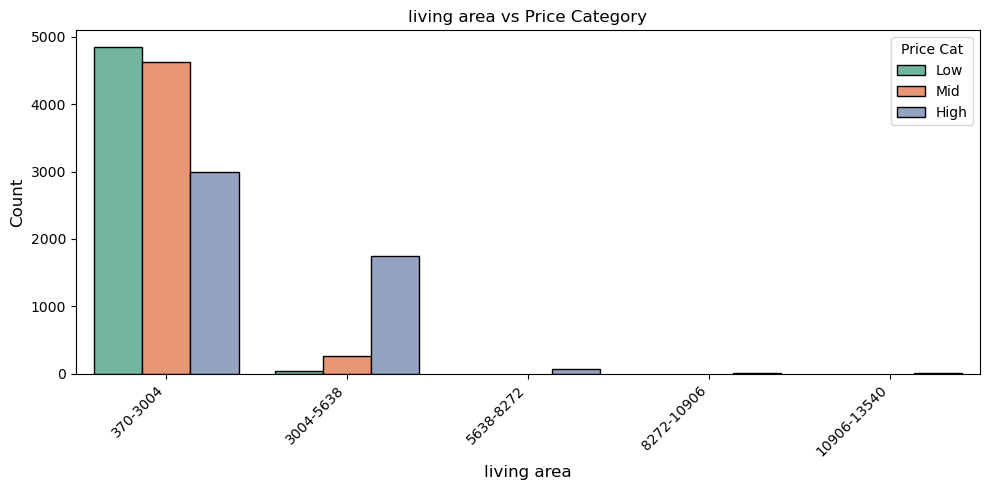

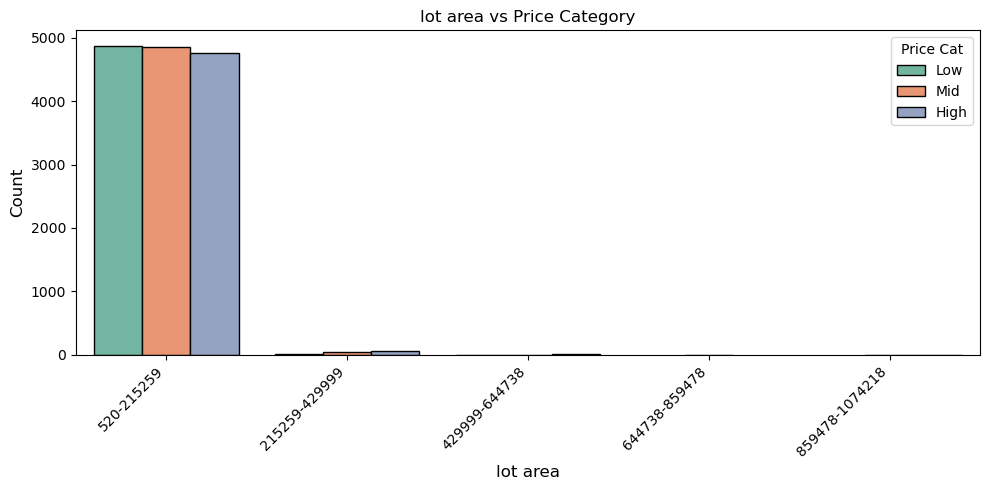

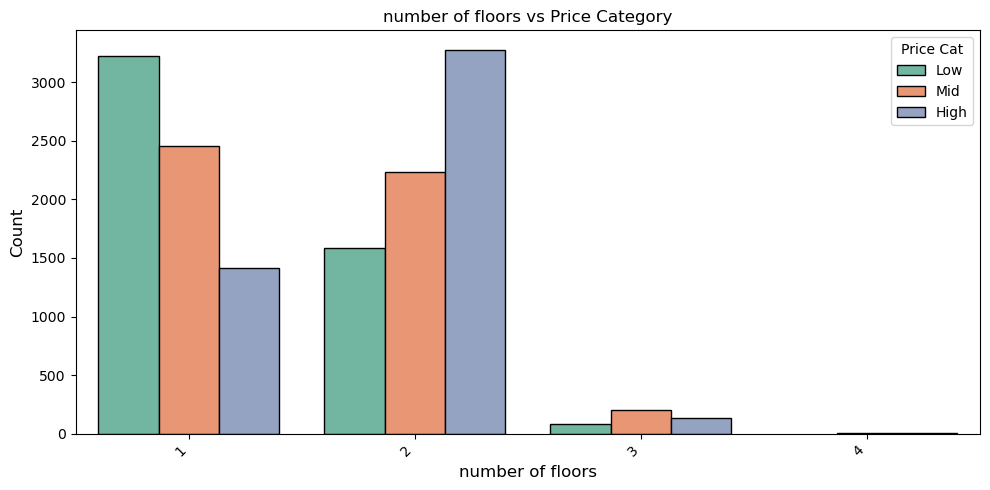

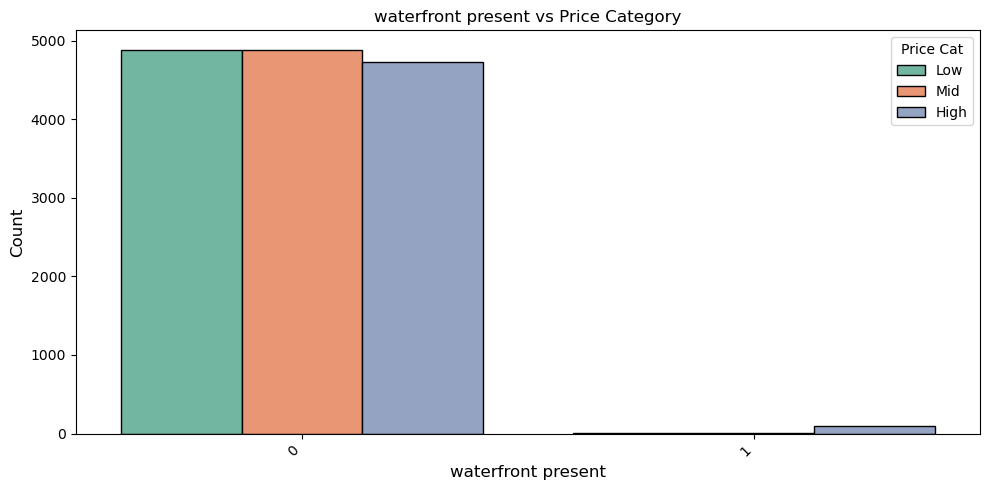

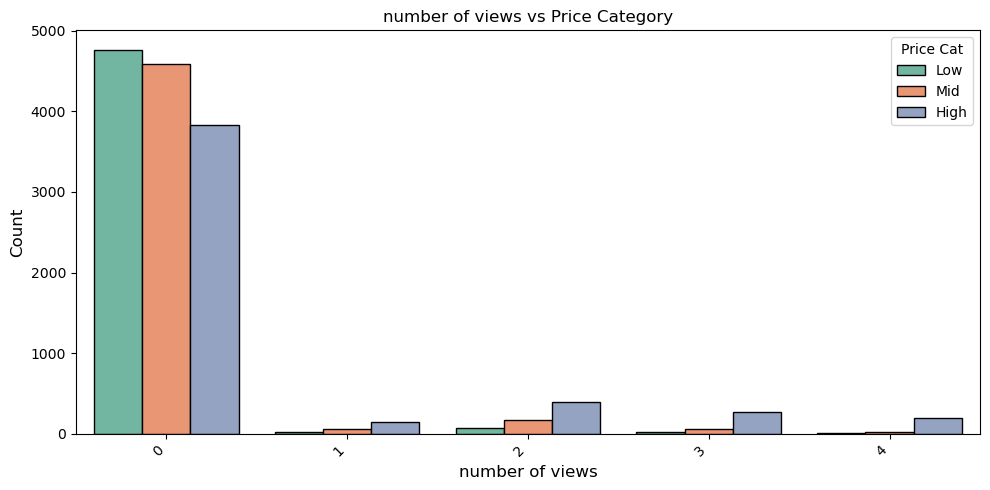

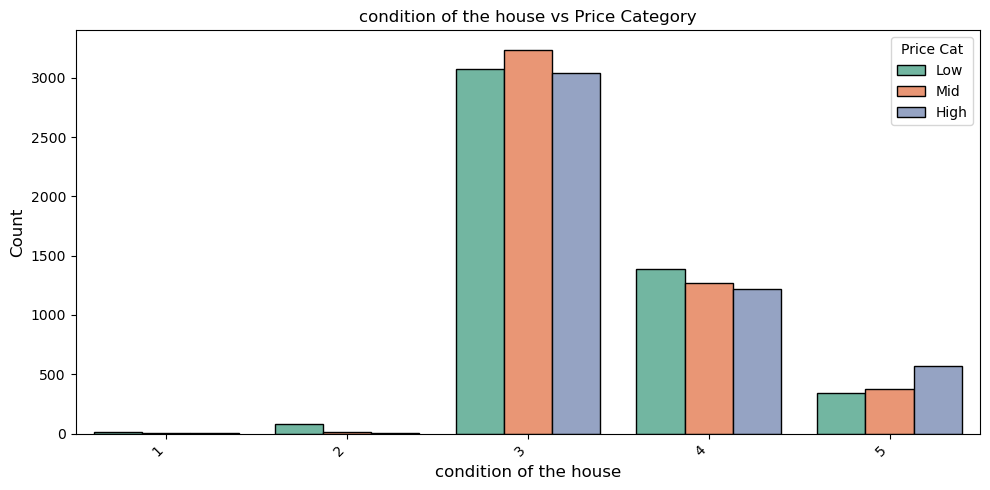

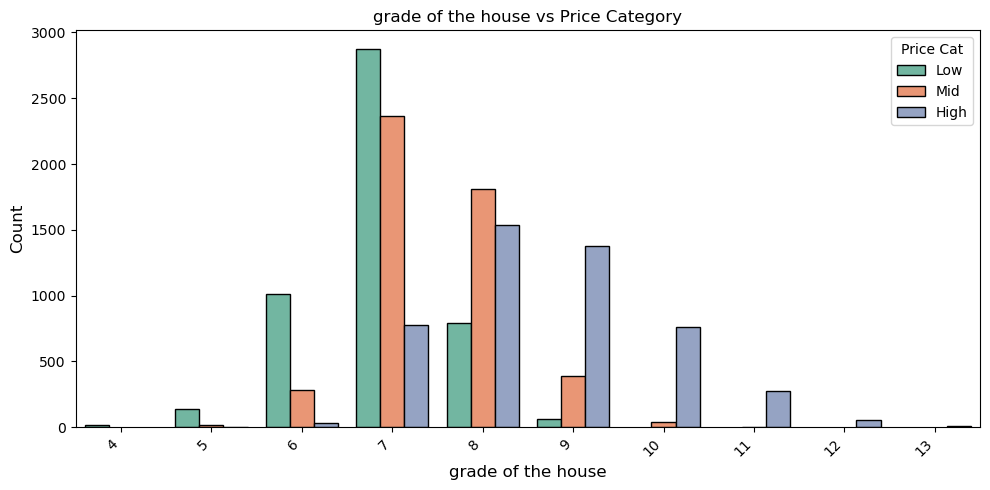

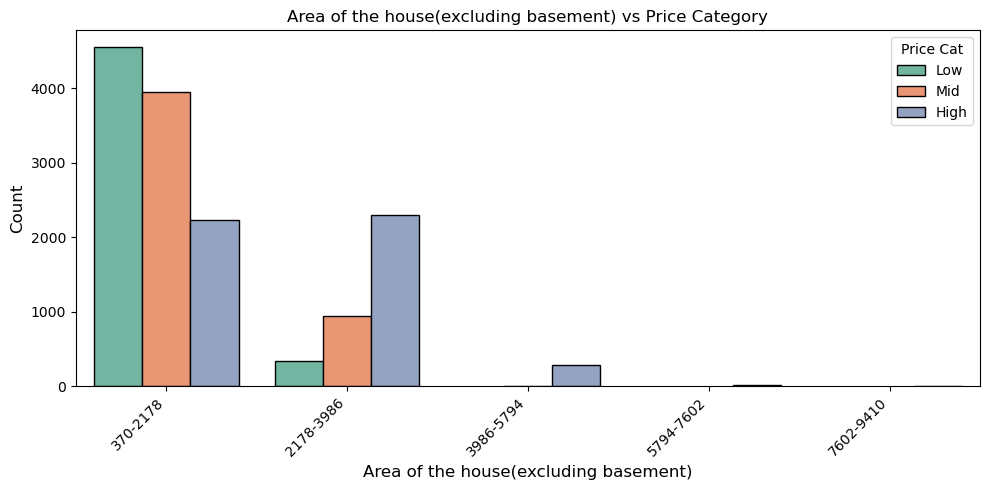

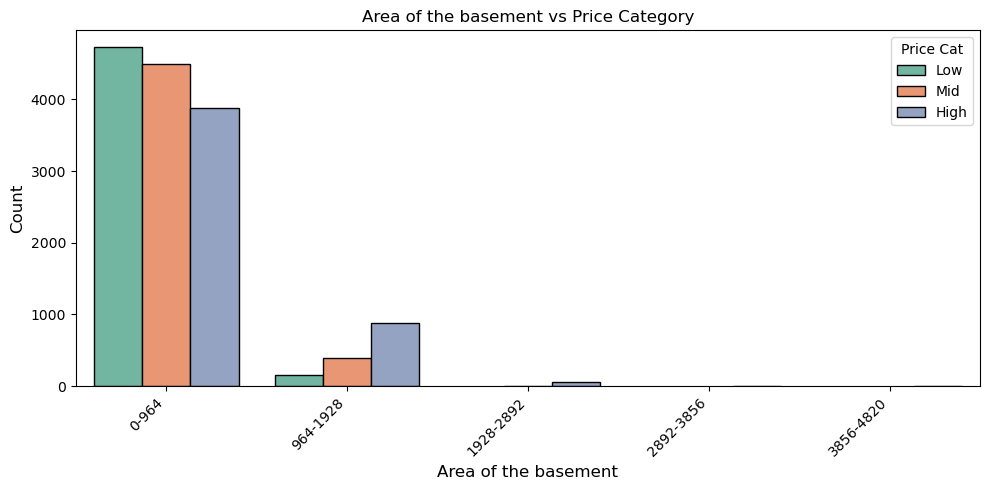

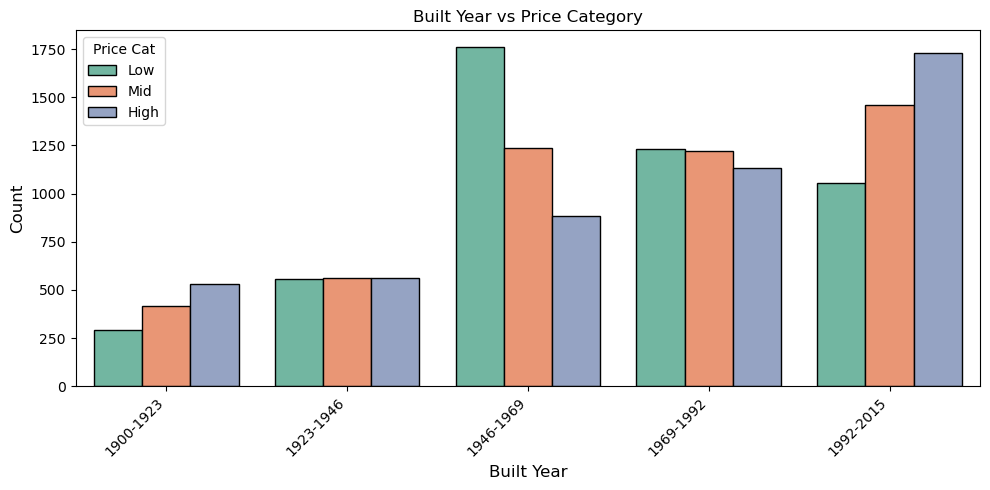

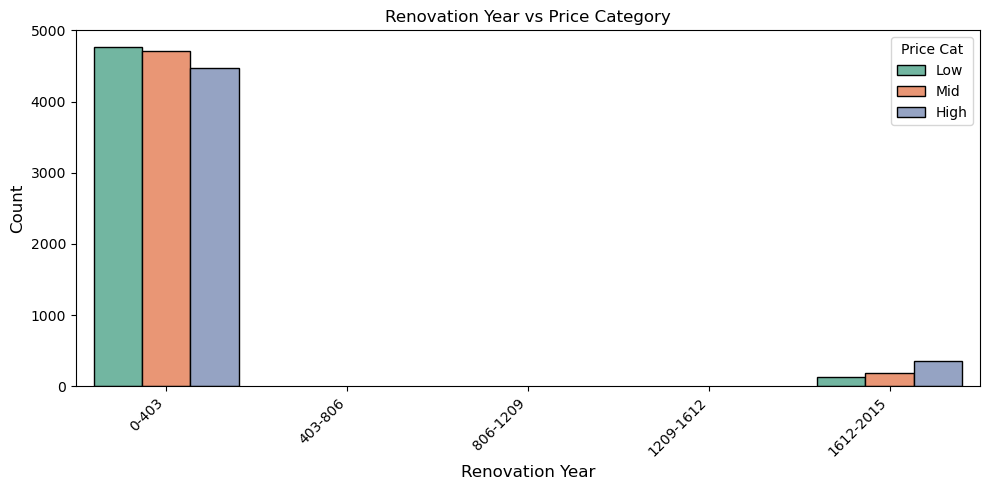

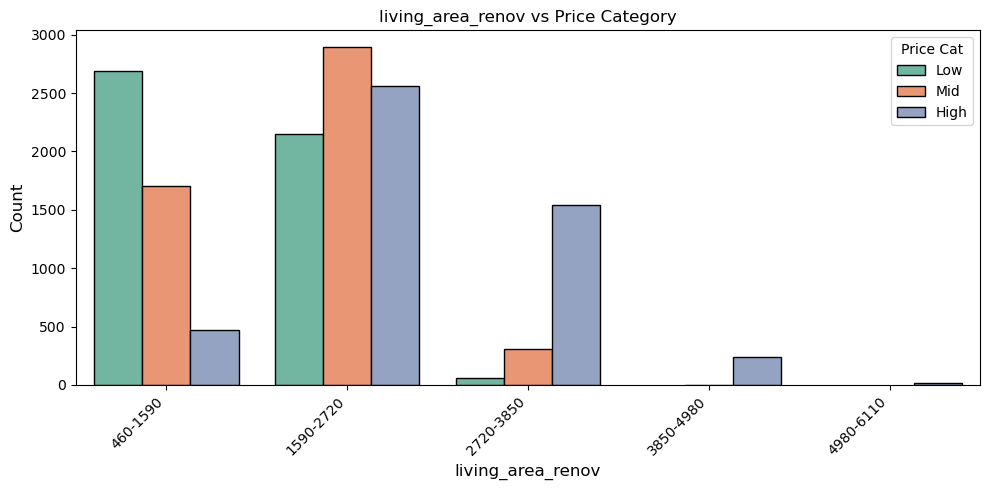

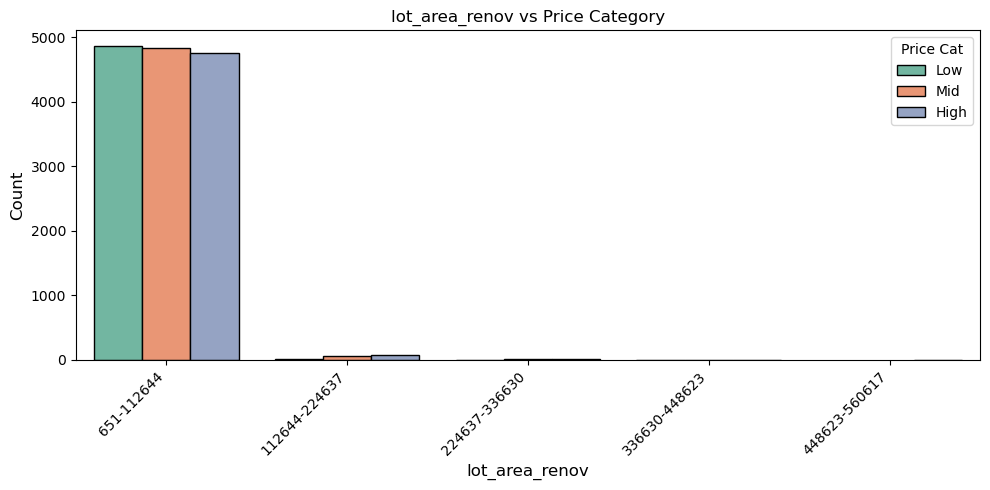

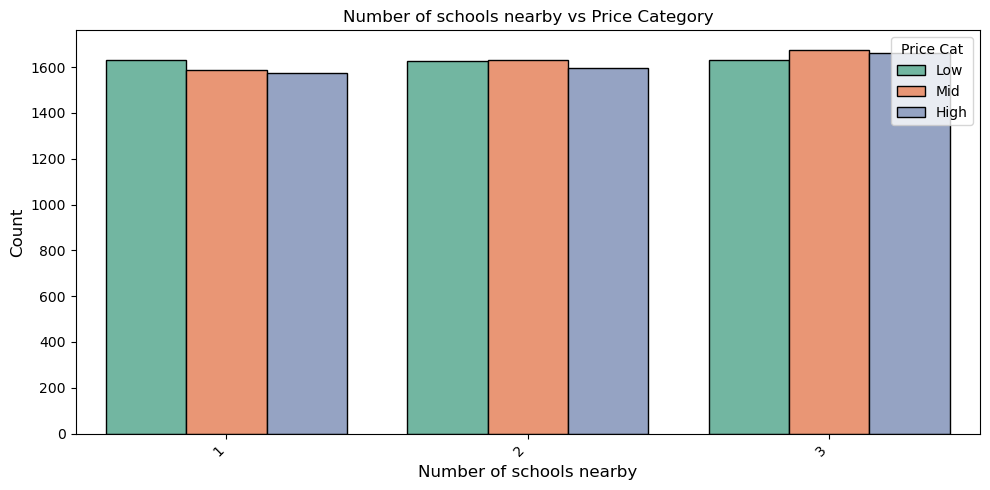

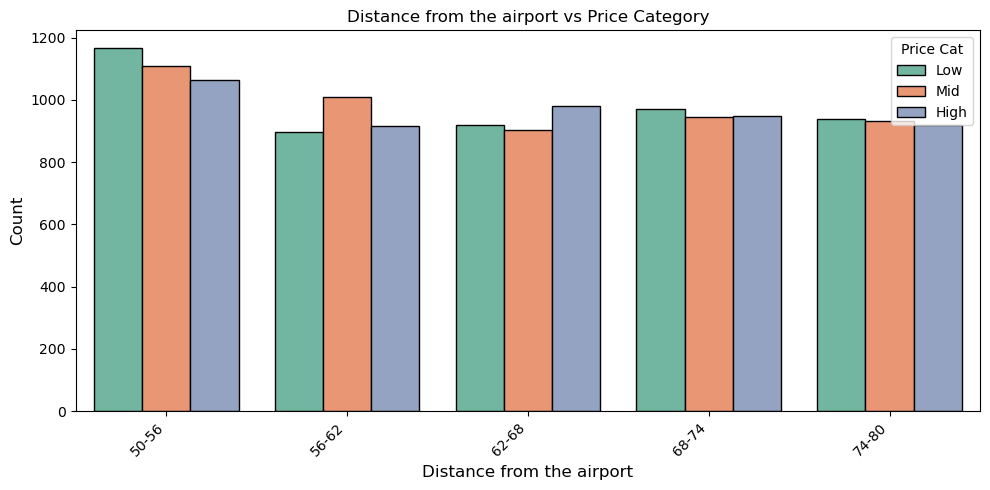

In [28]:
# Multivariate Analysis 
# Membandingkan semua fitur dengan price category (Low, Mid, High), kecuali fitur Postal Code, Latitude, dan Longitude
# Copy data agar df asli tidak berubah
df_plot = df.copy()

# 1. Buat kolom price_cat
df_plot['price_cat'] = pd.qcut(
    df_plot['Price'],
    q=3,
    labels=['Low','Mid','High']
)

# 2. Tentukan fitur yang mau diplot
exclude = {
    'Price','price_cat',
    'Lattitude','Longitude','Postal Code',
    'Date','id'
}
features = [c for c in df_plot.columns if c not in exclude]

# 3. Daftar discrete numeric yang ingin diperlakukan as-is
as_is = {
    'number of bedrooms',
    'number of bathrooms',
    'number of floors',
    'waterfront present',
    'number of views',
    'condition of the house',
    'grade of the house',
    'Number of schools nearby'
}

# 4. Fungsi pembantu untuk plot
def plot_count_by_price(plot_df, x, feat_name, order=None):
    plt.figure(figsize=(10,5))
    sns.countplot(
        data=plot_df,
        x=x,
        hue='price_cat',
        order=order,
        palette='Set2',
        edgecolor='k'
    )
    plt.title(f'{feat_name} vs Price Category', fontsize=12)
    plt.xlabel(feat_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Price Cat')
    plt.tight_layout()
    plt.show()

# 5. Loop per fitur
for col in features:
    s = df_plot[col]
    is_num = pd.api.types.is_numeric_dtype(s)
    uniq   = s.nunique()
    
    # 5a) Discrete numeric as-is
    if is_num and col in as_is:
        series_str = s.round().astype(int).astype(str)
        order      = list(map(str, sorted(map(int, series_str.unique()))))
        plot_df    = pd.DataFrame({'x': series_str, 'price_cat': df_plot['price_cat']})
        plot_count_by_price(plot_df, 'x', col, order=order)
    
    # 5b) Continuous numeric (>15 unique) → 5 rentang
    elif is_num and uniq > 15:
        vals = s.dropna()
        edges = np.linspace(vals.min(), vals.max(), 6).astype(int)
        # pastikan edges monoton naik dan unik
        edges = np.unique(edges)
        # buat label "1000-2000"
        labels = [f"{edges[i]}-{edges[i+1]}" for i in range(len(edges)-1)]
        binned = pd.cut(s, bins=edges, labels=labels, include_lowest=True)
        plot_df = pd.DataFrame({'x': binned.astype(str), 'price_cat': df_plot['price_cat']})
        plot_count_by_price(plot_df, 'x', col, order=labels)
    
    # 5c) Sisanya (categorical atau numeric sedikit unique)
    else:
        series_str = s.astype(str)
        order      = series_str.value_counts().index
        plot_df    = pd.DataFrame({'x': series_str, 'price_cat': df_plot['price_cat']})
        plot_count_by_price(plot_df, 'x', col, order=order)


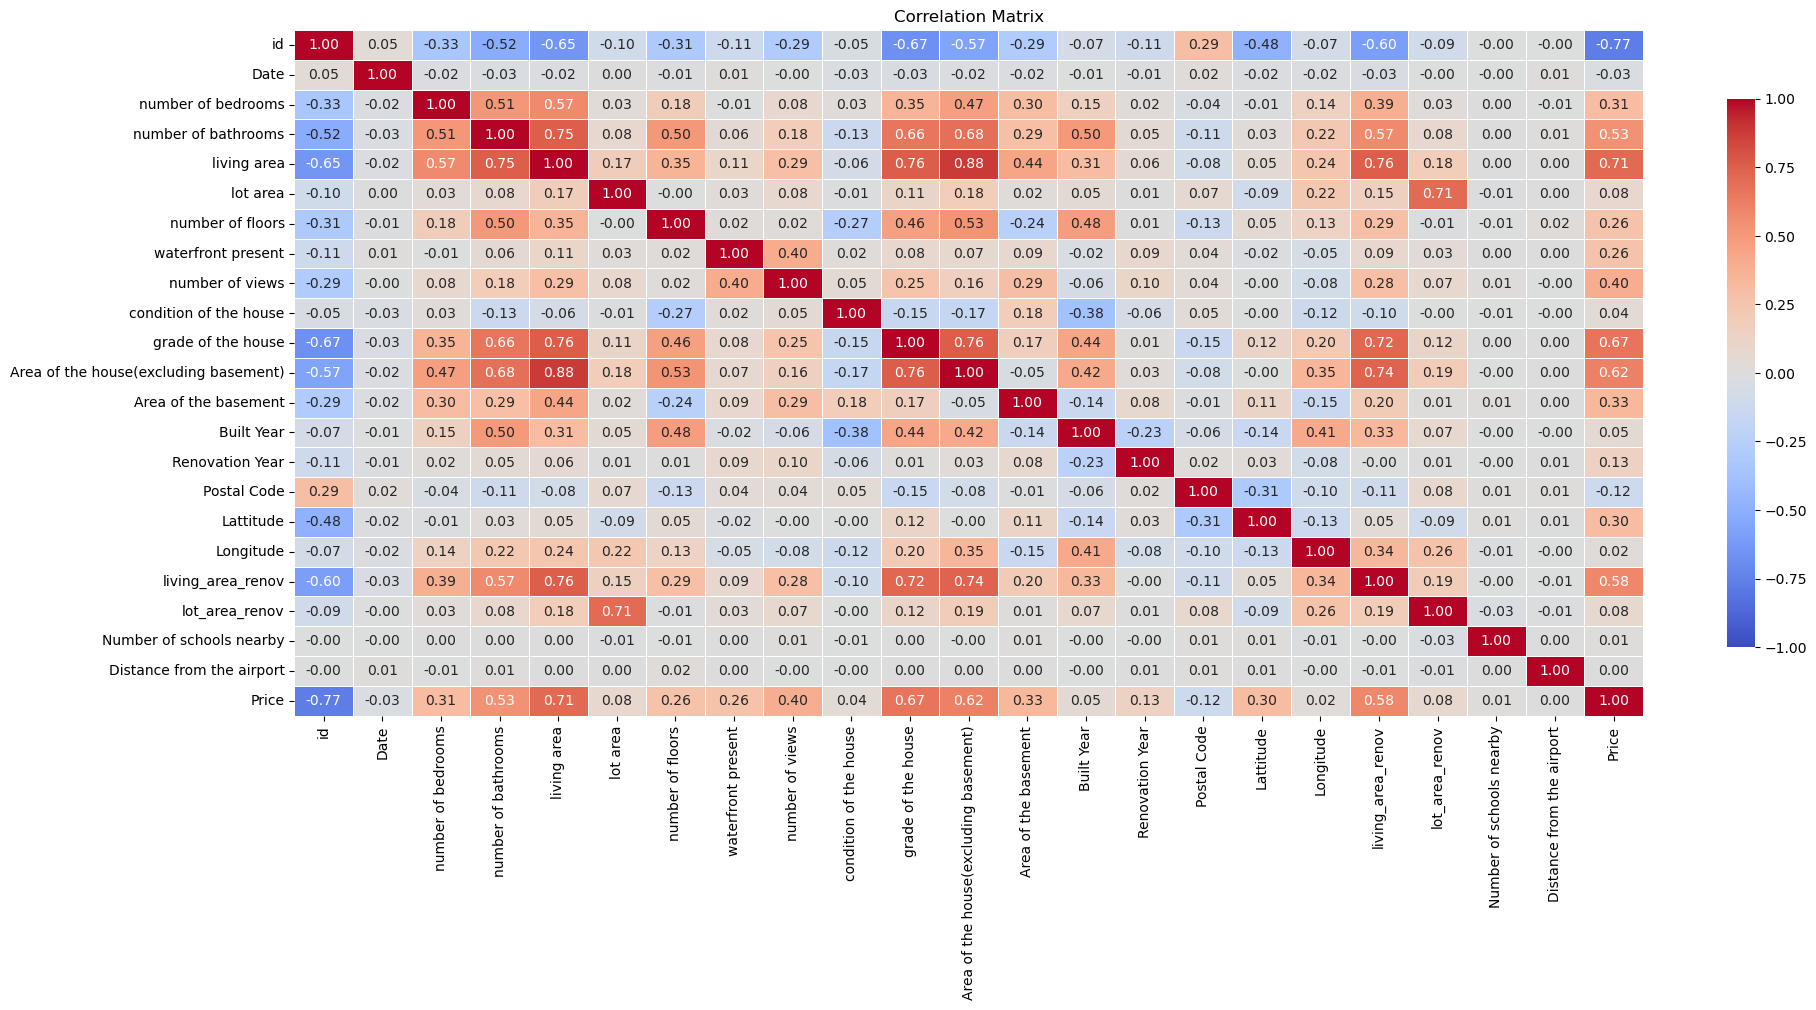

In [29]:
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr,
            annot=True,   
            cmap='coolwarm',
            fmt='.2f',
            vmin=-1, vmax=1,
            linewidths=.5,
            cbar_kws={'shrink': 0.8})
plt.tight_layout()
plt.title("Correlation Matrix")
plt.show()

In [30]:
# Salin dataframe agar tidak merusak df asli
df_corr = df.copy()

# Pilih hanya kolom numerik (kecuali target)
num_cols = df_corr.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('Price')               # keluarkan target

# Hitung korelasi absolut terhadap kolom 'Price'
corr_values = (
    df_corr[num_cols]
    .corrwith(df_corr['Price'])
    .abs()
    .sort_values(ascending=False)
)

print(corr_values)

id                                       0.773114
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
waterfront present                       0.263687
number of floors                         0.262732
Renovation Year                          0.133173
Postal Code                              0.115908
lot area                                 0.081992
lot_area_renov                           0.075535
Built Year                               0.050307
condition of the house                   0.041376
Date                                     0.027919
Longitude                                0.024414


In [31]:
# Melihat top 10 fitur yang paling berkorelasi dengan harga rumah
top10 = corr_values.head(10)
display(top10)

id                                       0.773114
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
dtype: float64

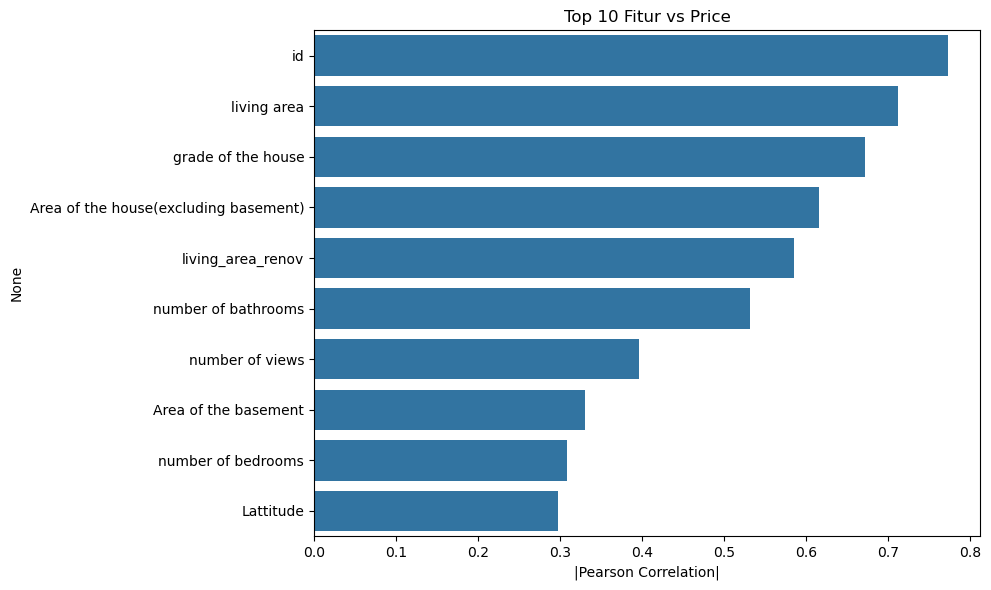

In [32]:
# Visualisasi Top 10 fitur yang paling berkorelasi dengan harga rumah
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, orient='h')
plt.xlabel('|Pearson Correlation|')
plt.title('Top 10 Fitur vs Price')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Tahapan yang akan dilakukan pada bagian ini pada proyek kali ini yaitu mendrop kolom yang tidak diperlukan, menangani outlier, dan membagi dataset menjadi train dan test.

In [33]:
# Buang kolom ID dan Date (tidak berguna untuk prediksi)
df = df.drop(columns=['id','Date'])

In [34]:
print("--- Info Data Rumah Setelah Penghapusan Kolom ID dan Date ---")
df.info()

--- Info Data Rumah Setelah Penghapusan Kolom ID dan Date ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of 

In [35]:
# Tangani outlier harga dan luas bangunan menggunakan metode IQR
for col in ['Price','living area']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
print(f"Dataset setelah drop outlier: {df.shape[0]} baris")

Dataset setelah drop outlier: 13646 baris


In [36]:
# Pisahkan fitur dan target
X = df.drop(columns='Price')
y = df['Price'].values

# Bagi data menjadi train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Total Data: {len(X)}')
print(f'Train Data: {len(X_train)}')
print(f'Test Data: {len(X_test)}')

Total Data: 13646
Train Data: 10916
Test Data: 2730
